## Author: Sridharan Chandran

# COMPUTER VISON - CNN PROJECT-1

## PART - A

**• DOMAIN:** Botanical Research

**• CONTEXT:** University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo.

**• DATA DESCRIPTION:** The dataset comprises of images from 12 plant species.

**Source:** https://www.kaggle.com/c/plant-seedlings-classification/data.

**• PROJECT OBJECTIVE:** To create a classifier capable of determining a plant's species from a photo.

## Steps and tasks: 
## 1. Import and Understand the data
### A. Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python. 
Hint: You can extract it Manually by losing 2 marks.
### B. Map the images from train folder with train labels to form a DataFrame. 
Hint: Create a DataFrame with 3 columns: Name of image, Species/class/type of image & actual image..
### C. Write a function that will select n random images and display images along with its species.
Hint: If input for function is 5, it should print 5 random images along with its labels.

In [1]:
#Import necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D, MaxPooling2D, MaxPool2D, GlobalMaxPooling2D, BatchNormalization
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc,classification_report, roc_curve
from tensorflow.keras import optimizers
from keras import regularizers
from keras.optimizers import SGD
from tensorflow.keras import backend
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras import optimizers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from glob import glob

In [2]:
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.11.0
/device:GPU:0
Num GPUs Available:  1


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Extract the ZIP file
file_path = "/content/drive/My Drive/Colab Notebooks/My Python Projects/CV Project 1 - CNN Architecture/plant-seedlings-classification.zip"
from zipfile import ZipFile
with ZipFile(file_path,'r') as zip:
  zip.extractall(path='/content/drive/My Drive/Colab Notebooks/My Python Projects/CV Project 1 - CNN Architecture/')

In [5]:
import os
import cv2

data_dir = '/content/drive/My Drive/Colab Notebooks/My Python Projects/CV Project 1 - CNN Architecture/plant-seedlings-classification/train/'

# Create empty lists to store the data
img_name = []
img_class = []
img = []

# Loop over all the classes in the data directory
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        # Loop over all the images in the class directory
        for img_file in os.listdir(class_dir):
            if img_file.endswith('.png'):
                img_path = os.path.join(class_dir, img_file)
                img_name.append(img_file)
                img_class.append(class_name)
                img.append(cv2.imread(img_path))

# Create a DataFrame from the data
df = pd.DataFrame({'img_name': img_name, 'class': img_class, 'img': img})


In [6]:
df.head()

,img_name,class,img
0,6a4ef17c2.png,Cleavers,"[[[45, 61, 72], [50, 66, 73], [28, 47, 49], [2..."
1,0515bc601.png,Cleavers,"[[[146, 156, 161], [146, 156, 162], [147, 156,..."
2,0ac327873.png,Cleavers,"[[[67, 78, 91], [63, 73, 88], [63, 74, 88], [6..."
3,94f82e916.png,Cleavers,"[[[45, 62, 80], [42, 57, 78], [46, 60, 81], [4..."
4,2c5c4d127.png,Cleavers,"[[[62, 98, 137], [59, 96, 135], [62, 97, 136],..."


In [7]:
df.shape

(4625, 3)

In [8]:
df['class'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Sugar beet                   385
Cleavers                     287
Charlock                     267
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        219
Name: class, dtype: int64

In [9]:
import random

def show_random_images(n):
    # Select n random images from the DataFrame
    rand_indices = random.sample(range(len(df)), n)
    rand_imgs = df.iloc[rand_indices]

    # Display the images
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i, ax in enumerate(axes):
        img = rand_imgs.iloc[i]['img']
        img_class = rand_imgs.iloc[i]['class']
        ax.imshow(img)
        ax.set_title(img_class)
    plt.show()

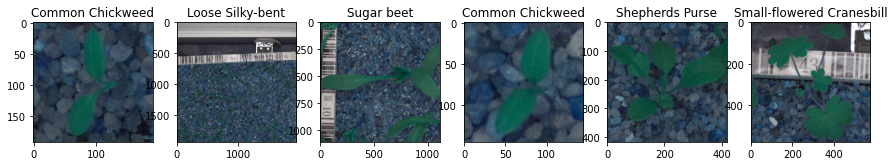

In [10]:
show_random_images(6)

## 2. Data preprocessing. 
### A. Create X & Y from the DataFrame.
### B. Encode labels of the images.
### C. Unify shape of all the images.
### D. Normalise all the images.

In [11]:
# Split the data as X and Y
X = df['img']
Y = df['class']

In [12]:
print("No. of classification is",Y.nunique(),'& the classes are', Y.unique())

No. of classification is 12 & the classes are ['Cleavers' 'Sugar beet' 'Common Chickweed' 'Loose Silky-bent'
 'Scentless Mayweed' 'Shepherds Purse' 'Fat Hen' 'Common wheat'
 'Black-grass' 'Small-flowered Cranesbill' 'Charlock' 'Maize']


In [13]:
label_map = {'Black-grass': 0,
             'Charlock': 1,
             'Cleavers': 2, 
             'Common Chickweed':3,
             'Common wheat':4,
             'Fat Hen':5,
             'Loose Silky-bent':6,
             'Maize':7,
             'Scentless Mayweed':8,
             'Shepherds Purse':9,
             'Small-flowered Cranesbill':10,
             'Sugar beet':11}  # map each class name to a unique integer
Y_int = [label_map[label] for label in Y]  # convert class names to integers
Y1 = to_categorical(Y_int)  # one-hot encode the integer labels


In [14]:
Y1.shape

(4625, 12)

In [15]:
# Define the new size
new_size = (128, 128)

# Resize the images
X_resized = []
for img in X:
    resized_img = cv2.resize(img, new_size)
    X_resized.append(resized_img)

# Convert the list of images to numpy array
X_resized = np.array(X_resized)


In [16]:
# Normalize the images
X_normalized = X_resized / 255

In [17]:
X_normalized.shape

(4625, 128, 128, 3)

## 3. Model training 
Checkpoint: Please make sure if shape of X is (No.of images, height, width, No. Of channels). If not, you need to correct it otherwise it will be issue during model training.
### A. Split the data into train and test data.
### B. Create new CNN architecture to train the model.
### C. Train the model on train data and validate on test data.
### D. Select a random image and print actual label and predicted label for the same.

In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y1, test_size=0.2, random_state=42)

In [19]:
print('shape of X train set', X_train.shape)
print('shape of Y train set', y_train.shape)

shape of X train set (3700, 128, 128, 3)
shape of Y train set (3700, 12)


In [44]:
from keras import backend as K
K.clear_session()

In [45]:
# Clear the backend session & set random seed
backend.clear_session()
import random
random.seed(42)
tf.random.set_seed(42)

In [46]:
import gc
gc.collect()

214

In [35]:
# Define the model
model = Sequential()

# Add convolutional layer
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(128, 128, 3)))

# Normalization layer
model.add(BatchNormalization())

# Add pooling layer
model.add(MaxPooling2D((2, 2)))

# Add convolutional layer
model.add(Conv2D(16, (3, 3), activation='relu'))

# Dropout
model.add(Dropout(0.5))

# Add pooling layer
model.add(MaxPooling2D((2, 2)))

# Flatten the output
model.add(Flatten())

# Add output layer
model.add(Dense(12, activation='softmax'))

opt = optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [36]:
history = model.fit(X_train, y_train,batch_size=50, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
74/74 [==============================] - 3s 25ms/step - loss: 1.7977 - accuracy: 0.4151 - val_loss: 2.4195 - val_accuracy: 0.2692
Epoch 2/50
74/74 [==============================] - 1s 16ms/step - loss: 0.9025 - accuracy: 0.7097 - val_loss: 2.3516 - val_accuracy: 0.1903
Epoch 3/50
74/74 [==============================] - 1s 20ms/step - loss: 0.6091 - accuracy: 0.8154 - val_loss: 2.2790 - val_accuracy: 0.2465
Epoch 4/50
74/74 [==============================] - 1s 20ms/step - loss: 0.4020 - accuracy: 0.8830 - val_loss: 1.6353 - val_accuracy: 0.4746
Epoch 5/50
74/74 [==============================] - 1s 16ms/step - loss: 0.3055 - accuracy: 0.9165 - val_loss: 1.2428 - val_accuracy: 0.6205
Epoch 6/50
74/74 [==============================] - 1s 15ms/step - loss: 0.1897 - accuracy: 0.9597 - val_loss: 1.3260 - val_accuracy: 0.5557
Epoch 7/50
74/74 [==============================] - 1s 15ms/step - loss: 0.1056 - accuracy: 0.9816 - val_loss: 1.0405 - val_accuracy: 0.6422
Epoch 8/50
74

In [37]:
# score of test data
score = model.evaluate(X_test, y_test)
print("Loss : %.2f" %(score[0]))
print("Accuracy : %.2f" %(score[1]))

29/29 [==============================] - 0s 6ms/step - loss: 1.6293 - accuracy: 0.7124
Loss : 1.63
Accuracy : 0.71


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 8)      32        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 16)       0         
 2D)                                                             
                                                        

Text(0.5, 1.0, 'Training and validation loss')

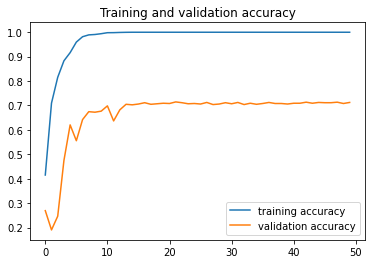

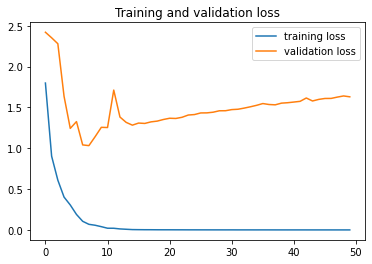

In [48]:
# Plot the training & Validation Loss & accuracy
Acc = history.history['accuracy']
Val_acc  = history.history['val_accuracy']
Loss     = history.history['loss']
Val_loss = history.history['val_loss']

epochs   = range(len(Acc)) # Get number of epochs

plt.plot  ( epochs, Acc, label = 'training accuracy' )
plt.plot  ( epochs, Val_acc, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, Loss, label = 'training loss' )
plt.plot  ( epochs, Val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

In [49]:
# Select a random image and print actual label and predicted label for the same
idx = np.random.randint(X_test.shape[0])
image = X_test[idx]
label = y_test[idx]

image label 2


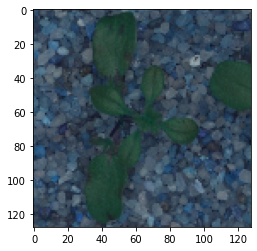

In [54]:
print('image label',np.argmax(label))
plt.imshow(image);

In [55]:
prediction = model.predict(np.expand_dims(image, axis=0))
print("Actual label:", np.argmax(label))
print("Predicted label:", np.argmax(prediction))

1/1 [==============================] - 0s 190ms/step
Actual label: 2
Predicted label: 2
